8. Using Naive Bayes algorithms, predict if a person is diabetic or not, based on the features provided. Find accuracy and F1-Scores of both algorithms.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# 1. Load data (no headers)
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)

# 2. Split features (X) and target (y) using iloc
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# 3. Split into train and test sets FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we dont use standard scaler in naive bayes , because the standard scaler operation can merge two very close values to same fraction

# 7. Train and evaluate model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


Accuracy: 0.7662
F1-Score: 0.6842


Here is the full code for predicting diabetes using Naive Bayes, including the ability for the user to input custom data for prediction:



Selected Features: [np.str_('Pregnancies'), np.str_('Glucose'), np.str_('BMI'), np.str_('DiabetesPedigree'), np.str_('Age')]


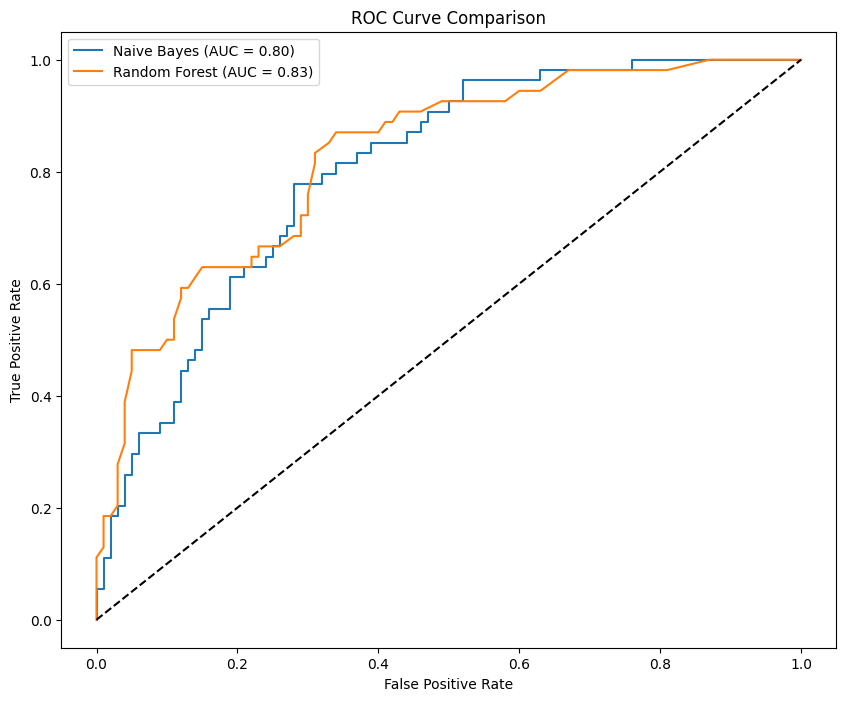

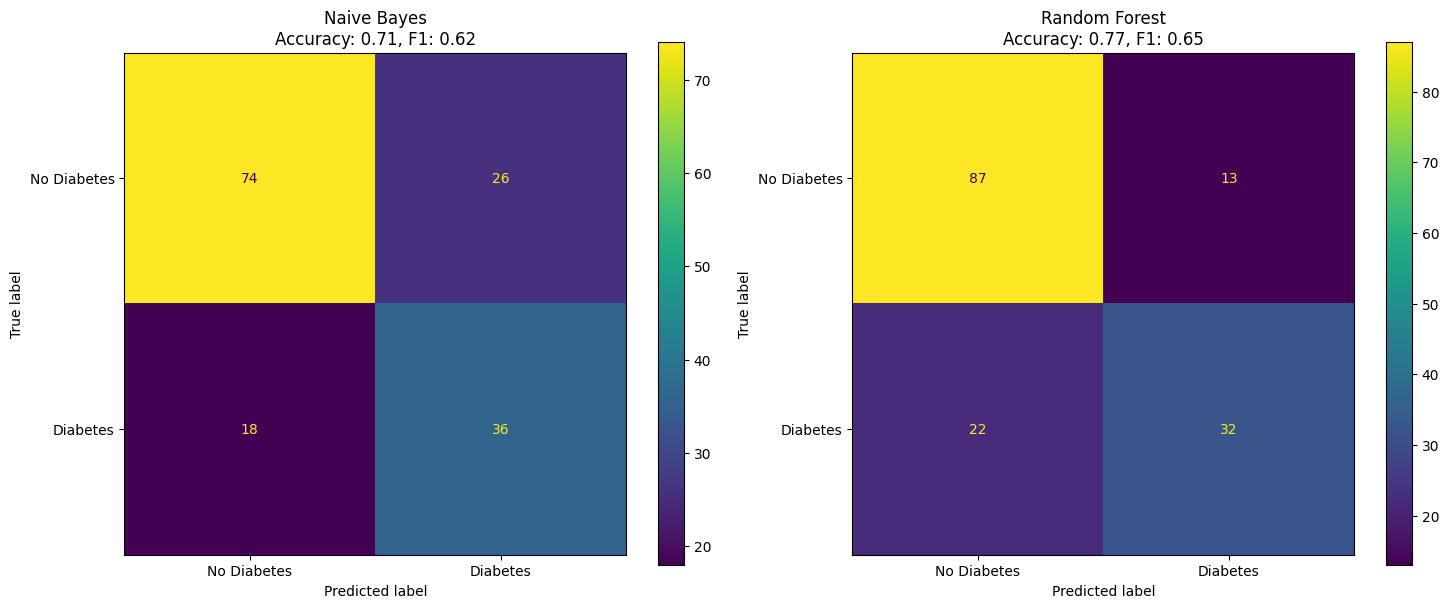

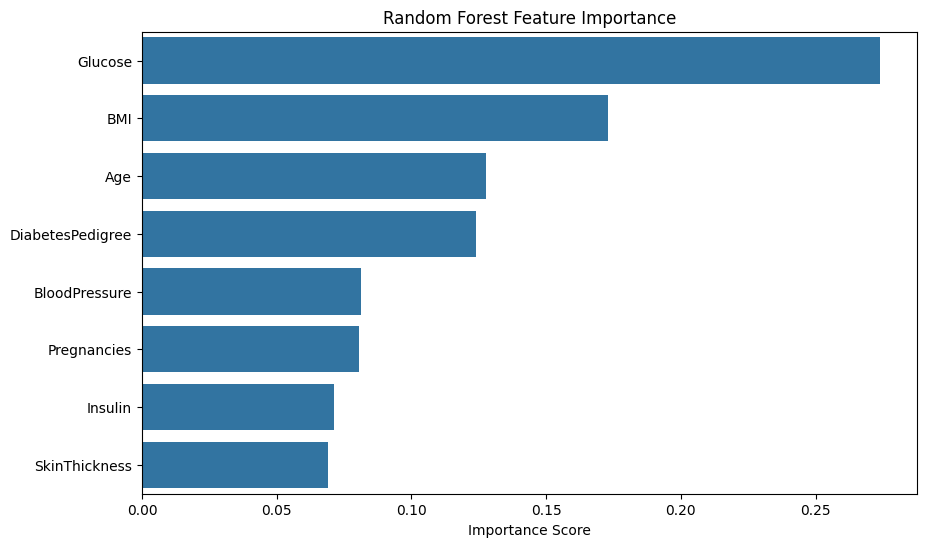


Model Performance Comparison:
               Accuracy  F1-Score                    CM
Naive Bayes    0.714286   0.62069  [[74, 26], [18, 36]]
Random Forest  0.772727  0.646465  [[87, 13], [22, 32]]

--- Predict Diabetes for Custom Data ---

Prediction: Diabetic
Probability of being Diabetic: 0.95


d:\Github all\subham_git_notes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.utils import class_weight

# Load data
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
target_name = 'Outcome'

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.columns = feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = np.array(feature_names)[selected_mask]
print(f"Selected Features: {list(selected_features)}")

# Class Weighting
weights = class_weight.compute_sample_weight('balanced', y_train)

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == "Naive Bayes":
        model.fit(X_train_selected, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_selected)[:, 1]
    else:
        model.fit(X_train_scaled, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    y_pred = model.predict(X_test_selected if name == "Naive Bayes" else X_test_scaled)
    
    # Metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'CM': confusion_matrix(y_test, y_pred)
    }
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for ax, (name, result) in zip(axes, results.items()):
    ConfusionMatrixDisplay(result['CM'], display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax)
    ax.set_title(f"{name}\nAccuracy: {result['Accuracy']:.2f}, F1: {result['F1-Score']:.2f}")
plt.tight_layout()
plt.show()

# Feature Importance
rf = models["Random Forest"]
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

# Print results
print("\nModel Performance Comparison:")
print(pd.DataFrame(results).T)

# Add a section for custom user input
print("\n--- Predict Diabetes for Custom Data ---")
custom_data = input("Enter values for the features (comma-separated):\n"
                    "Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age\n")

# Convert the input string to a numpy array
custom_data = np.array([float(x) for x in custom_data.split(",")]).reshape(1, -1)

# Apply the same preprocessing steps as the training data
custom_data_scaled = scaler.transform(custom_data)
custom_data_selected = selector.transform(custom_data_scaled)

# Predict using the Naive Bayes model
custom_prediction = models["Naive Bayes"].predict(custom_data_selected)
custom_prediction_prob = models["Naive Bayes"].predict_proba(custom_data_selected)[:, 1]

# Output the prediction
print(f"\nPrediction: {'Diabetic' if custom_prediction[0] == 1 else 'Non-Diabetic'}")
print(f"Probability of being Diabetic: {custom_prediction_prob[0]:.2f}")

The provided code implements a machine learning pipeline to predict whether a person is diabetic or not using the **Naive Bayes** and **Random Forest** algorithms. Below is a detailed explanation of the code:

---

### **1. Problem Statement**
The goal is to predict if a person is diabetic based on features such as pregnancies, glucose levels, blood pressure, BMI, etc. The dataset used is the **Pima Indians Diabetes Dataset**.

---

### **2. Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.utils import class_weight

- **`pandas`**: For data manipulation and analysis.
- **`numpy`**: For numerical operations.
- **`matplotlib` and `seaborn`**: For data visualization.
- **`sklearn`**: For preprocessing, feature selection, model training, and evaluation.

---

### **3. Loading and Preprocessing the Dataset**


In [ ]:
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
target_name = 'Outcome'

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.columns = feature_names

- **Dataset**: The dataset is loaded from a CSV file without headers.
- **Feature Names**: The columns are renamed for better readability.
- **Features (`X`)**: All columns except the last one are used as features.
- **Target (`y`)**: The last column is used as the target variable (`Outcome`), where `1` indicates diabetic and `0` indicates non-diabetic.

---

### **4. Splitting the Dataset**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- **Train-Test Split**: The dataset is split into training (80%) and testing (20%) sets.
- **Stratification**: Ensures that the class distribution in the training and testing sets is similar to the original dataset.

---

### **5. Standard Scaling**


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance. This is important for algorithms sensitive to feature scaling (e.g., Random Forest).

---

### **6. Feature Selection**


In [ ]:
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_mask = selector.get_support()
selected_features = np.array(feature_names)[selected_mask]
print(f"Selected Features: {list(selected_features)}")

- **`SelectKBest`**: Selects the top `k` features based on their statistical significance (ANOVA F-test in this case).
- **Selected Features**: The top 5 features are selected and printed.

---

### **7. Class Weighting**


In [ ]:
weights = class_weight.compute_sample_weight('balanced', y_train)

- **Class Weighting**: Computes weights to handle class imbalance in the dataset. This ensures that the model does not favor the majority class.

---

### **8. Model Initialization**


In [ ]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

- Two models are initialized:
  - **Naive Bayes**: A probabilistic classifier based on Bayes' theorem.
  - **Random Forest**: An ensemble learning method that uses multiple decision trees.

---

### **9. Training and Evaluation**


In [ ]:
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == "Naive Bayes":
        model.fit(X_train_selected, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_selected)[:, 1]
    else:
        model.fit(X_train_scaled, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    y_pred = model.predict(X_test_selected if name == "Naive Bayes" else X_test_scaled)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'CM': confusion_matrix(y_test, y_pred)
    }
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

- **Training**: Each model is trained on the training data.
- **Predictions**:
  - `y_pred`: Predicted class labels.
  - `y_prob`: Predicted probabilities for the positive class (diabetic).
- **Metrics**:
  - **Accuracy**: Proportion of correct predictions.
  - **F1-Score**: Harmonic mean of precision and recall.
  - **Confusion Matrix**: Counts of true positives, true negatives, false positives, and false negatives.
- **ROC Curve**: Plots the False Positive Rate (FPR) vs. True Positive Rate (TPR) for each model.
- **AUC**: Area Under the Curve, a measure of the model's ability to distinguish between classes.

---

### **10. Plotting the ROC Curve**


In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

- **ROC Curve**: Visualizes the performance of each model in distinguishing between classes.

---

### **11. Confusion Matrices**


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for ax, (name, result) in zip(axes, results.items()):
    ConfusionMatrixDisplay(result['CM'], display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax)
    ax.set_title(f"{name}\nAccuracy: {result['Accuracy']:.2f}, F1: {result['F1-Score']:.2f}")
plt.tight_layout()
plt.show()

- **Confusion Matrices**: Displays the confusion matrix for each model as a heatmap.

---

### **12. Feature Importance (Random Forest)**


In [ ]:
rf = models["Random Forest"]
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

- **Feature Importance**: Visualizes the importance of each feature in the Random Forest model.

---

### **13. Custom Prediction**


In [ ]:
print("\n--- Predict Diabetes for Custom Data ---")
custom_data = input("Enter values for the features (comma-separated):\n"
                    "Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age\n")

custom_data = np.array([float(x) for x in custom_data.split(",")]).reshape(1, -1)
custom_data_scaled = scaler.transform(custom_data)
custom_data_selected = selector.transform(custom_data_scaled)

custom_prediction = models["Naive Bayes"].predict(custom_data_selected)
custom_prediction_prob = models["Naive Bayes"].predict_proba(custom_data_selected)[:, 1]

print(f"\nPrediction: {'Diabetic' if custom_prediction[0] == 1 else 'Non-Diabetic'}")
print(f"Probability of being Diabetic: {custom_prediction_prob[0]:.2f}")

- **User Input**: Allows the user to input custom feature values.
- **Prediction**: Uses the Naive Bayes model to predict whether the person is diabetic or not.

---

### **Summary**
This code builds a machine learning pipeline to predict diabetes using Naive Bayes and Random Forest. It includes data preprocessing, feature selection, model training, evaluation, and visualization. Additionally, it allows for custom predictions based on user input.



### Key Features:
1. **Data Preprocessing**: Includes scaling and feature selection.
2. **Model Training**: Trains both Naive Bayes and Random Forest models.
3. **Evaluation**: Evaluates models using accuracy, F1-score, confusion matrices, and ROC curves.
4. **Custom Prediction**: Allows the user to input custom data for prediction using the Naive Bayes model.

Selected Features: [np.str_('Pregnancies'), np.str_('Glucose'), np.str_('BMI'), np.str_('DiabetesPedigree'), np.str_('Age')]


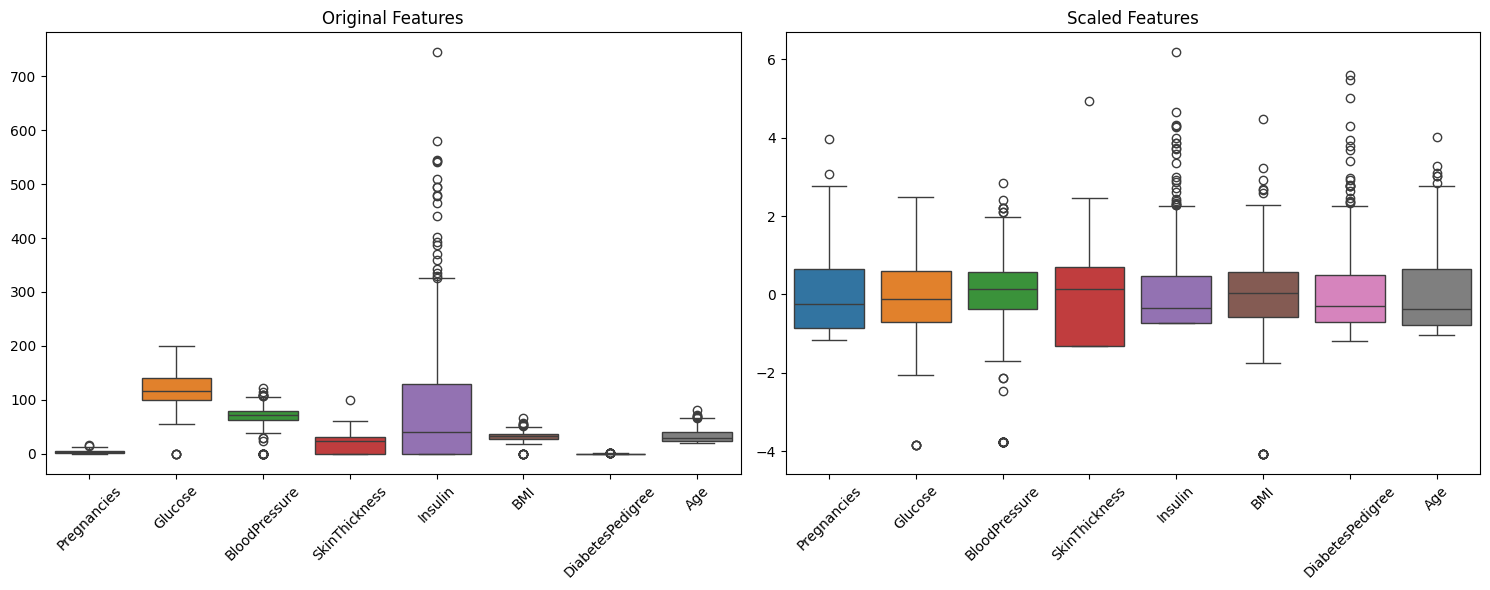

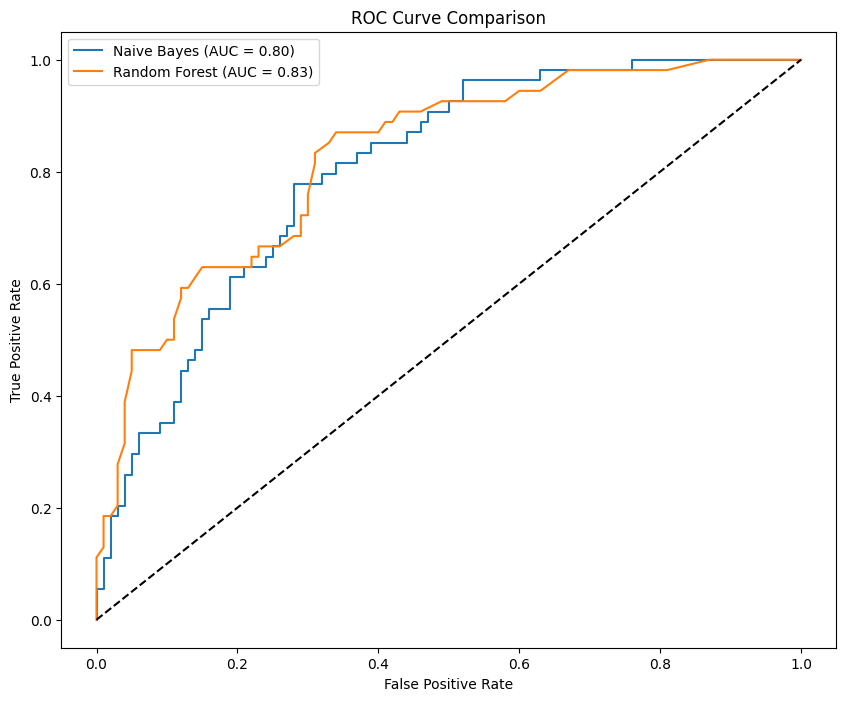

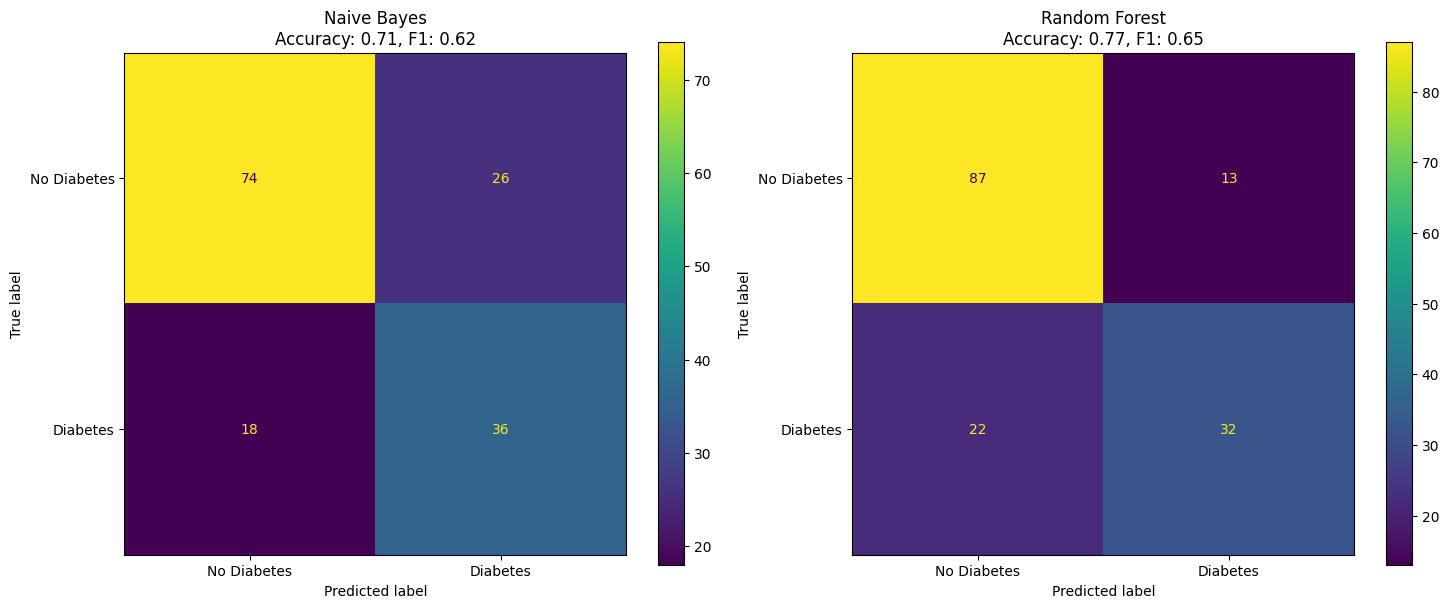

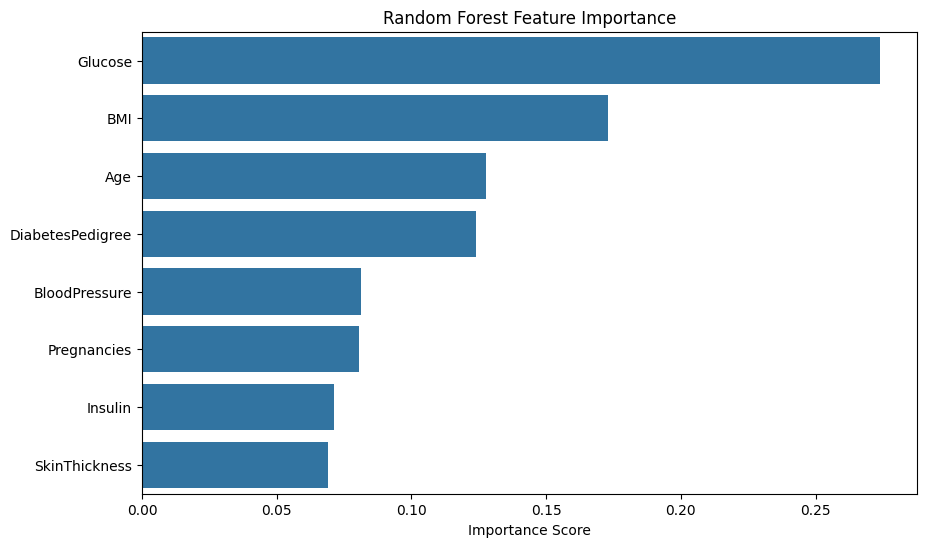


Model Performance Comparison:
               Accuracy  F1-Score                    CM
Naive Bayes    0.714286   0.62069  [[74, 26], [18, 36]]
Random Forest  0.772727  0.646465  [[87, 13], [22, 32]]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, 
                           confusion_matrix, roc_curve, auc,
                           ConfusionMatrixDisplay)
from sklearn.utils import class_weight

# Load data
data = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
target_name = 'Outcome'

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.columns = feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = np.array(feature_names)[selected_mask]
print(f"Selected Features: {list(selected_features)}")

# Class Weighting
weights = class_weight.compute_sample_weight('balanced', y_train)

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Visualization 1: Feature Distributions Before/After Scaling
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Original Features")
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=feature_names))
plt.title("Scaled Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train and evaluate
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == "Naive Bayes":
        model.fit(X_train_selected, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_selected)[:, 1]
    else:
        model.fit(X_train_scaled, y_train, sample_weight=weights)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    y_pred = model.predict(X_test_selected if name == "Naive Bayes" else X_test_scaled)
    
    # Metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'CM': confusion_matrix(y_test, y_pred)
    }
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for ax, (name, result) in zip(axes, results.items()):
    ConfusionMatrixDisplay(result['CM'], 
                         display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax)
    ax.set_title(f"{name}\nAccuracy: {result['Accuracy']:.2f}, F1: {result['F1-Score']:.2f}")
plt.tight_layout()
plt.show()

# Feature Importance
rf = models["Random Forest"]
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

# Print results
print("\nModel Performance Comparison:")
print(pd.DataFrame(results).T)